#**GCED - AA1: Pràctica - Breast Cancer Dataset**





El càncer de mama és el càncer més comú entre les dones al món. Representa el 25% de tots els casos de càncer i va afectar més de 2,1 milions de persones només el 2015. Comença quan les cèl·lules de la mama comencen a créixer sense control. Aquestes cèl·lules solen formar tumors que es poden veure mitjançant radiografia o sentir com a bonyes a la zona del pit.


https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators:

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg.
	Breast cancer diagnosis and prognosis via linear programming.
	Operations Research, 43(4), pages 570-577, July-August 1995.

Medical literature:

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian.
	Machine learning techniques to diagnose breast cancer from
	fine-needle aspirates.  
	Cancer Letters 77 (1994) 163-171.

	W.H. Wolberg, W.N. Street, and O.L. Mangasarian.
	Image analysis and machine learning applied to breast cancer
	diagnosis and prognosis.  
	Analytical and Quantitative Cytology and Histology, Vol. 17
	No. 2, pages 77-87, April 1995.

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian.
	Computerized breast cancer diagnosis and prognosis from fine
	needle aspirates.  
	Archives of Surgery 1995;130:511-516.

	W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian.
	Computer-derived nuclear features distinguish malignant from
	benign breast cytology.  
	Human Pathology, 26:792--796, 1995.

See also:
	http://www.cs.wisc.edu/~olvi/uwmp/mpml.html
	http://www.cs.wisc.edu/~olvi/uwmp/cancer.html

Results:

	- predicting field 2, diagnosis: B = benign, M = malignant
	- sets are linearly separable using all 30 input features
	- best predictive accuracy obtained using one separating plane
		in the 3-D space of Worst Area, Worst Smoothness and
		Mean Texture.  Estimated accuracy 97.5% using repeated
		10-fold crossvalidations.  Classifier has correctly
		diagnosed 176 consecutive new patients as of November
		1995.

4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

5. Number of instances: 569

6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

7. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


9. Class distribution: 357 benign, 212 malignan

# Data preprocessing

## Data shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import seaborn as sns
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)

from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from statsmodels.genmod.generalized_linear_model import GLM

In [ ]:
df = pd.read_csv("breast-cancer-mv.csv")
(df)

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,...,25.380,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,2,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,...,24.990,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,3,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,...,23.570,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,4,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,...,14.910,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,5,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,...,22.540,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,926424,M,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,...,25.450,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071
565,566,926682,M,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,...,23.690,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066
566,567,926954,M,16.60,28.08,108.30,858.1,0.085,0.102,0.093,...,18.980,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078
567,568,927241,M,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,...,25.740,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124


In [ ]:
#df.describe()
df[['id', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']].describe()

,id,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean
count,5.690e+02,569.000,569.000,569.000,569.000,569.000
mean,3.037e+07,14.127,19.290,654.889,0.096,0.089
std,1.250e+08,3.524,4.301,351.914,0.014,0.080
min,8.670e+03,6.981,9.710,143.500,0.053,0.000
25%,8.692e+05,11.700,16.170,420.300,0.086,0.030
50%,9.060e+05,13.370,18.840,551.100,0.096,0.062
75%,8.813e+06,15.780,21.800,782.700,0.105,0.131
max,9.113e+08,28.110,39.280,2501.000,0.163,0.427


In [ ]:
df.iloc[:,[i for i in range(23,33)]].describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,-474.389
std,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,2127.705
min,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,-9999.000
25%,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.070
50%,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.079
75%,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.091
max,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207


La variable que volem predir és _diagnosis_, que pot prendre valor "M" o "B". Es tracta d'un dataset de classificació.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave.points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [ ]:
# drop id , Unnamed: 32 columns
columns_to_drop = ["id", 'Unnamed: 0']

for column in columns_to_drop:
    df.drop(column, axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,...,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,...,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,...,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,...,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,...,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


## Variable encoding

In [ ]:
#encoding de la variable diagnosis
df['diagnosis'] = df['diagnosis'].map({"M":1, "B":0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,...,25.380,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,...,24.990,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,...,23.570,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,1,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,...,14.910,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,1,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,...,22.540,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,...,25.450,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071
565,1,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,...,23.690,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066
566,1,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,...,18.980,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078
567,1,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,...,25.740,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124


## Spliting train and test

In [ ]:
X = df.loc[:,df.columns != 'diagnosis']
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df_train = X_train.copy()
df_train['diagnosis'] = y_train
df_train.head()
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
149,13.74,17.91,88.12,585.0,0.079,0.064,0.029,0.013,0.147,0.056,...,22.46,97.19,725.9,0.097,0.182,0.156,0.060,0.235,0.070,0
124,13.37,16.39,86.10,553.5,0.071,0.073,0.081,0.028,0.142,0.058,...,22.75,91.99,632.1,0.102,0.253,0.331,0.090,0.205,0.076,0
421,14.69,13.98,98.22,656.1,0.103,0.184,0.145,0.063,0.209,0.074,...,18.34,114.10,809.2,0.131,0.363,0.322,0.111,0.283,0.092,0
195,12.91,16.33,82.53,516.4,0.079,0.054,0.039,0.024,0.183,0.057,...,22.00,90.81,600.6,0.110,0.151,0.176,0.082,0.302,0.069,0
545,13.62,23.23,87.19,573.2,0.092,0.067,0.030,0.024,0.166,0.058,...,29.09,97.58,729.8,0.122,0.152,0.105,0.072,0.264,0.070,0


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,88.12,585.0,0.079,0.064,0.029,0.013,0.147,0.056,...,15.34,22.46,97.19,725.9,0.097,0.182,0.156,0.060,0.235,0.070
124,13.37,16.39,86.10,553.5,0.071,0.073,0.081,0.028,0.142,0.058,...,14.26,22.75,91.99,632.1,0.102,0.253,0.331,0.090,0.205,0.076
421,14.69,13.98,98.22,656.1,0.103,0.184,0.145,0.063,0.209,0.074,...,16.46,18.34,114.10,809.2,0.131,0.363,0.322,0.111,0.283,0.092
195,12.91,16.33,82.53,516.4,0.079,0.054,0.039,0.024,0.183,0.057,...,13.88,22.00,90.81,600.6,0.110,0.151,0.176,0.082,0.302,0.069
545,13.62,23.23,87.19,573.2,0.092,0.067,0.030,0.024,0.166,0.058,...,15.35,29.09,97.58,729.8,0.122,0.152,0.105,0.072,0.264,0.070


## X_train preprocessing


In [ ]:
M = B = 0
for e in y_train:
  if e == 1: M += 1
  else: B += 1
print("diagnosis")
print("M", M)
print("B", B)

diagnosis
M 149
B 249


In [ ]:
X_train.shape

(398, 30)

<Axes: xlabel='diagnosis', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Target Values')

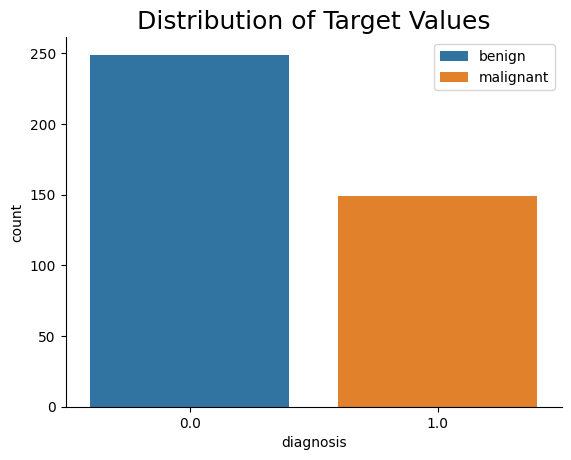

In [ ]:
sns.countplot(data=df, x=y_train, hue="diagnosis")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(['benign', 'malignant'])
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

### Dealing with X_train missing values

<Axes: >

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

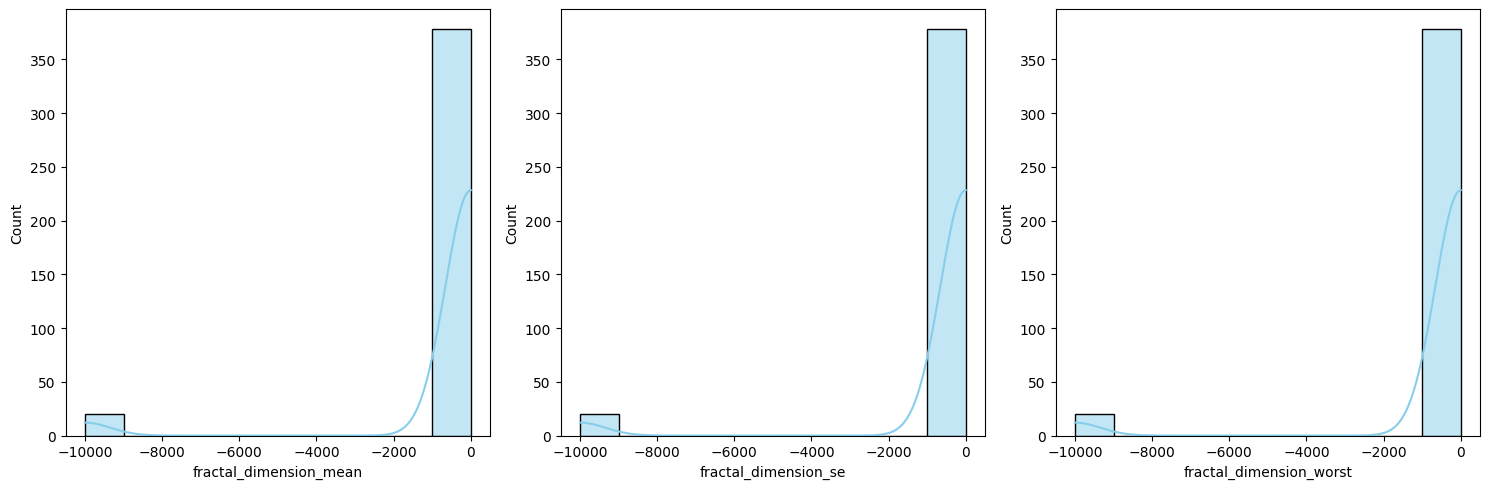

In [ ]:
column_names = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i,column in enumerate(column_names):
    col = i
    plt.subplot(1, 3, i+1)
    sns.histplot(data=X_train[column], bins=10, color='skyblue',kde=True, edgecolor='black')

    # Set labels and title
    # axs[0, col].set_xlabel(f'{column}')
    # axs[0, col].set_ylabel('Frequency')
    # axs[0, col].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

In [ ]:
(X_train.fractal_dimension_mean==-9999).value_counts()
(X_train.fractal_dimension_se==-9999).value_counts()
(X_train.fractal_dimension_worst==-9999).value_counts()



fractal_dimension_mean
False    378
True      20
Name: count, dtype: int64

fractal_dimension_se
False    378
True      20
Name: count, dtype: int64

fractal_dimension_worst
False    378
True      20
Name: count, dtype: int64

In [ ]:
X_train[X_train.fractal_dimension_mean == -9999][['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]

,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
174,-9999.0,-9999.0,-9999.0
66,-9999.0,-9999.0,-9999.0
74,-9999.0,-9999.0,-9999.0
499,-9999.0,-9999.0,-9999.0
297,-9999.0,-9999.0,-9999.0
307,-9999.0,-9999.0,-9999.0
96,-9999.0,-9999.0,-9999.0
202,-9999.0,-9999.0,-9999.0
223,-9999.0,-9999.0,-9999.0
53,-9999.0,-9999.0,-9999.0


Podem veure que tenim missing values, indicats amb el valor -9999 a algunes files del dataset a les variables relacionades amb la fractal_dimension (és a dir, les variables fractal_dimension_mean, fractal_dimension_worst i fractal_dimension_se). Canviem els valors d'aquests missing values a NA:

In [ ]:
X_train.fractal_dimension_mean[df.fractal_dimension_mean == -9999] = np.nan
X_train.fractal_dimension_se[df.fractal_dimension_se == -9999] = np.nan
X_train.fractal_dimension_worst[df.fractal_dimension_worst == -9999] = np.nan


df_train = X_train.copy()
df_train['diagnosis'] = y_train

In [ ]:
X_train.describe()[['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]

,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
count,378.000,3.780e+02,378.000
mean,0.063,3.791e-03,0.084
std,0.007,2.699e-03,0.018
min,0.050,8.948e-04,0.055
25%,0.057,2.229e-03,0.071
50%,0.061,3.207e-03,0.080
75%,0.066,4.470e-03,0.092
max,0.097,2.984e-02,0.173


In [ ]:
X_train.shape
X_train.info()

(398, 30)

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave.points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   378 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se            398 

<Axes: >

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

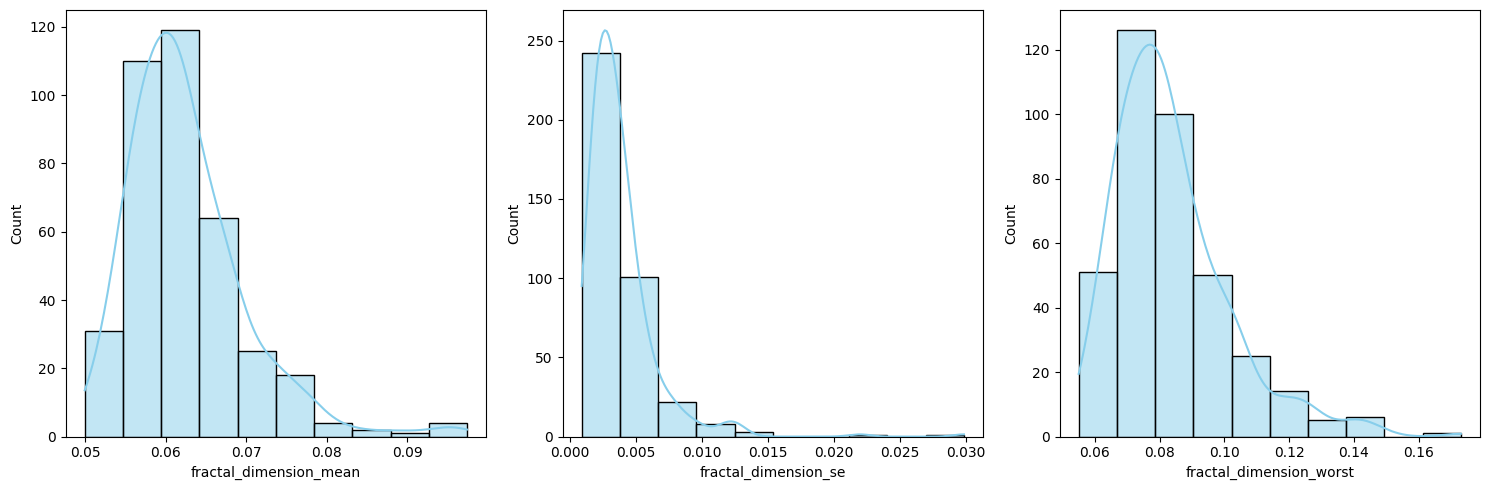

In [ ]:
column_names = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i,column in enumerate(column_names):
    col = i
    plt.subplot(1, 3, i+1)
    sns.histplot(data=X_train[column], bins=10, color='skyblue',kde=True, edgecolor='black')

    # Set labels and title
    # axs[0, col].set_xlabel(f'{column}')
    # axs[0, col].set_ylabel('Frequency')
    # axs[0, col].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

Solucionat!

### Missing values imputation


<Axes: >

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

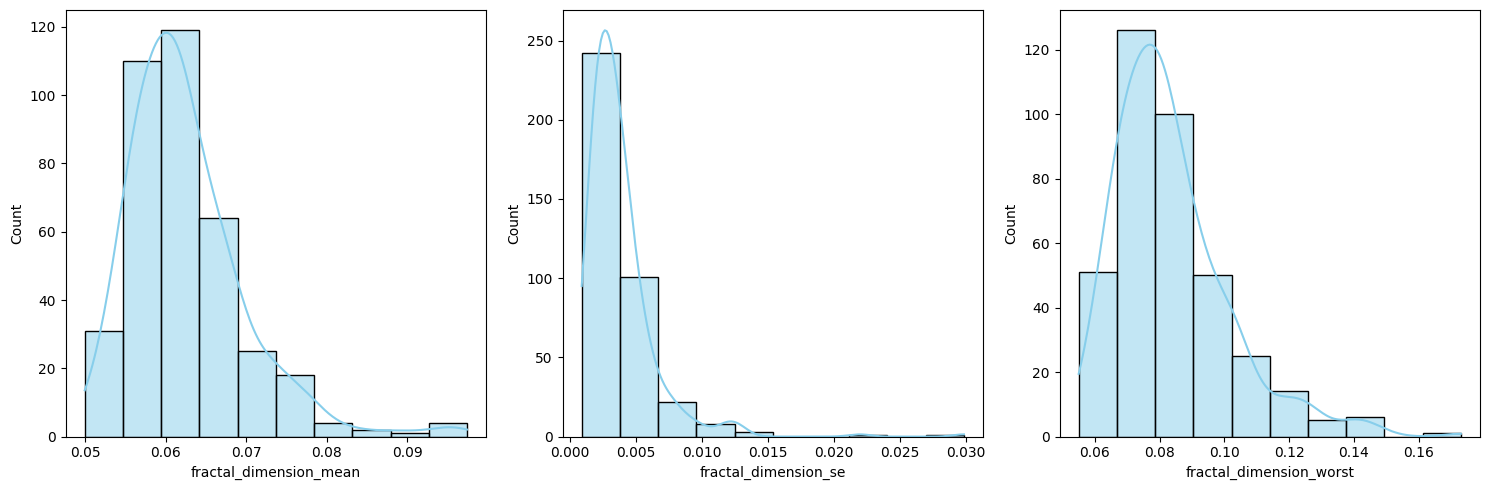

In [ ]:
column_names = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i,column in enumerate(column_names):
    col = i
    plt.subplot(1, 3, i+1)
    sns.histplot(data=X_train[column], bins=10, color='skyblue',kde=True, edgecolor='black')

    # Set labels and title
    # axs[0, col].set_xlabel(f'{column}')
    # axs[0, col].set_ylabel('Frequency')
    # axs[0, col].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

In [ ]:
missing_rows = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

subset_of_df_train = df_train.drop(columns=missing_rows)
subset_of_df_train.shape

rows_not_missing = df_train.fractal_dimension_mean.notna() & df_train.fractal_dimension_se.notna() & df_train.fractal_dimension_worst.notna()

df_train_without_missing = subset_of_df_train[rows_not_missing]
df_train_without_missing.shape

(398, 28)

(378, 28)

imputation of fractal_dimension_mean

In [ ]:
fd_mean_missing_values = subset_of_df_train[df_train.fractal_dimension_mean.isna()]
fd_mean_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_train_without_missing, df_train.fractal_dimension_mean[rows_not_missing])
knn_mean = knn.predict(fd_mean_missing_values)

(20, 28)

KNeighborsRegressor(n_neighbors=1)

imputation of fractal_dimension_se

In [ ]:
fd_se_missing_values = subset_of_df_train[df_train.fractal_dimension_se.isna()]
fd_se_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_train_without_missing, df_train.fractal_dimension_se[rows_not_missing])
knn_se = knn.predict(fd_se_missing_values)


(20, 28)

KNeighborsRegressor(n_neighbors=1)

imputation of fractal_dimension_worst

In [ ]:
fd_worst_missing_values = subset_of_df_train[df_train.fractal_dimension_worst.isna()]
fd_worst_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_train_without_missing, df_train.fractal_dimension_worst[rows_not_missing])
knn_worst = knn.predict(fd_worst_missing_values)

(20, 28)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
X_train.fractal_dimension_mean[X_train.fractal_dimension_mean.isna()] = knn_mean
X_train.fractal_dimension_se[X_train.fractal_dimension_se.isna()] = knn_se
X_train.fractal_dimension_worst[X_train.fractal_dimension_worst.isna()] = knn_worst

In [ ]:
X_train.shape

(398, 30)

In [ ]:
df_train = X_train.copy()
df_train['diagnosis'] = y_train
df_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
149,13.74,17.91,88.12,585.0,0.079,0.064,0.029,0.013,0.147,0.056,...,22.46,97.19,725.9,0.097,0.182,0.156,0.060,0.235,0.070,0
124,13.37,16.39,86.10,553.5,0.071,0.073,0.081,0.028,0.142,0.058,...,22.75,91.99,632.1,0.102,0.253,0.331,0.090,0.205,0.076,0
421,14.69,13.98,98.22,656.1,0.103,0.184,0.145,0.063,0.209,0.074,...,18.34,114.10,809.2,0.131,0.363,0.322,0.111,0.283,0.092,0
195,12.91,16.33,82.53,516.4,0.079,0.054,0.039,0.024,0.183,0.057,...,22.00,90.81,600.6,0.110,0.151,0.176,0.082,0.302,0.069,0
545,13.62,23.23,87.19,573.2,0.092,0.067,0.030,0.024,0.166,0.058,...,29.09,97.58,729.8,0.122,0.152,0.105,0.072,0.264,0.070,0


<Axes: >

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

<Axes: >

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

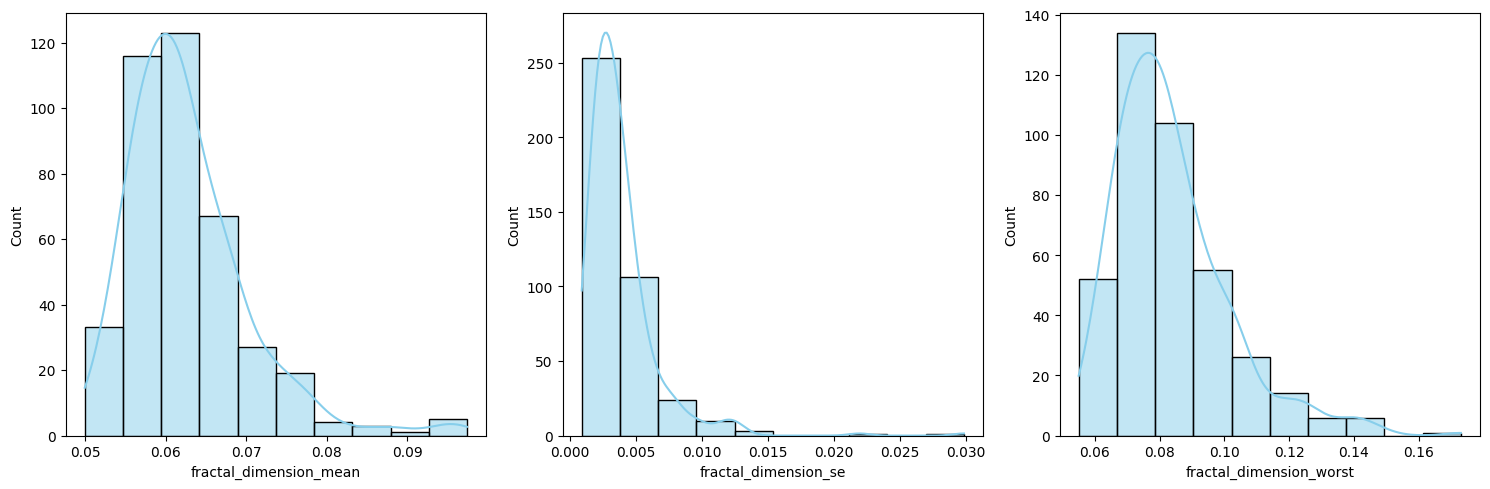

In [ ]:
column_names = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i,column in enumerate(column_names):
    col = i
    plt.subplot(1, 3, i+1)
    sns.histplot(data=X_train[column], bins=10, color='skyblue',kde=True, edgecolor='black')

    # Set labels and title
    # axs[0, col].set_xlabel(f'{column}')
    # axs[0, col].set_ylabel('Frequency')
    # axs[0, col].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave.points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se                  398 non-null    float64
 14  smoothness_se            398 

## Dealing with X_test missing values

Ara realitzarem la imputacio dels missing values de X_test sense mirar la distribucio del target ni les variables que imputarem, ja que no volem introduïr cap biaix al nostre model respecte les dades target.

Primer de tot, comprovem on tenim presència de missing values:

In [ ]:
(X_test.fractal_dimension_mean==-9999).value_counts()
(X_test.fractal_dimension_se==-9999).value_counts()
(X_test.fractal_dimension_worst==-9999).value_counts()

fractal_dimension_mean
False    164
True       7
Name: count, dtype: int64

fractal_dimension_se
False    164
True       7
Name: count, dtype: int64

fractal_dimension_worst
False    164
True       7
Name: count, dtype: int64

In [ ]:
X_test.fractal_dimension_mean[df.fractal_dimension_mean == -9999] = np.nan
X_test.fractal_dimension_se[df.fractal_dimension_se == -9999] = np.nan
X_test.fractal_dimension_worst[df.fractal_dimension_worst == -9999] = np.nan

df_test = X_test.copy()
df_test['diagnosis'] = y_test

In [ ]:
X_test.shape
X_test.info()

(171, 30)

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 204 to 247
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              171 non-null    float64
 1   texture_mean             171 non-null    float64
 2   perimeter_mean           171 non-null    float64
 3   area_mean                171 non-null    float64
 4   smoothness_mean          171 non-null    float64
 5   compactness_mean         171 non-null    float64
 6   concavity_mean           171 non-null    float64
 7   concave.points_mean      171 non-null    float64
 8   symmetry_mean            171 non-null    float64
 9   fractal_dimension_mean   164 non-null    float64
 10  radius_se                171 non-null    float64
 11  texture_se               171 non-null    float64
 12  perimeter_se             171 non-null    float64
 13  area_se                  171 non-null    float64
 14  smoothness_se            171 

In [ ]:
missing_rows = ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

subset_of_df_test = df_test.drop(columns=missing_rows)
subset_of_df_test.shape

rows_not_missing = df_test.fractal_dimension_mean.notna() & df_test.fractal_dimension_se.notna() & df_test.fractal_dimension_worst.notna()

df_test_without_missing = subset_of_df_test[rows_not_missing]
df_test_without_missing.shape

(171, 28)

(164, 28)

In [ ]:
fd_mean_missing_values = subset_of_df_test[df_test.fractal_dimension_mean.isna()]
fd_mean_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_test_without_missing, df_test.fractal_dimension_mean[rows_not_missing])
knn_mean = knn.predict(fd_mean_missing_values)

(7, 28)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
fd_se_missing_values = subset_of_df_test[df_test.fractal_dimension_se.isna()]
fd_se_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_test_without_missing, df_test.fractal_dimension_se[rows_not_missing])
knn_se = knn.predict(fd_se_missing_values)

(7, 28)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
fd_worst_missing_values = subset_of_df_test[df_test.fractal_dimension_worst.isna()]
fd_worst_missing_values.shape

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df_test_without_missing, df_test.fractal_dimension_worst[rows_not_missing])
knn_worst = knn.predict(fd_worst_missing_values)

(7, 28)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
X_test.fractal_dimension_mean[X_test.fractal_dimension_mean.isna()] = knn_mean
X_test.fractal_dimension_se[X_test.fractal_dimension_se.isna()] = knn_se
X_test.fractal_dimension_worst[X_test.fractal_dimension_worst.isna()] = knn_worst
X_test.shape

(171, 30)

In [ ]:
df_test = X_test.copy()
df_test['diagnosis'] = y_test
df_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
204,12.47,18.60,81.09,481.9,0.100,0.106,0.080,0.038,0.193,0.082,...,24.64,96.05,677.9,0.143,0.238,0.267,0.102,0.301,0.207,0
70,18.94,21.31,123.60,1130.0,0.090,0.103,0.108,0.080,0.158,0.055,...,26.58,165.90,1866.0,0.119,0.234,0.269,0.179,0.255,0.066,1
131,15.46,19.48,101.70,748.9,0.109,0.122,0.147,0.081,0.193,0.058,...,26.00,124.90,1156.0,0.155,0.239,0.379,0.151,0.284,0.080,1
431,12.40,17.68,81.47,467.8,0.105,0.132,0.077,0.028,0.181,0.071,...,22.91,89.61,515.8,0.145,0.263,0.240,0.074,0.256,0.094,0
540,11.54,14.44,74.65,402.9,0.100,0.112,0.067,0.026,0.182,0.068,...,19.68,78.78,457.8,0.135,0.212,0.180,0.069,0.233,0.081,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 204 to 247
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              171 non-null    float64
 1   texture_mean             171 non-null    float64
 2   perimeter_mean           171 non-null    float64
 3   area_mean                171 non-null    float64
 4   smoothness_mean          171 non-null    float64
 5   compactness_mean         171 non-null    float64
 6   concavity_mean           171 non-null    float64
 7   concave.points_mean      171 non-null    float64
 8   symmetry_mean            171 non-null    float64
 9   fractal_dimension_mean   171 non-null    float64
 10  radius_se                171 non-null    float64
 11  texture_se               171 non-null    float64
 12  perimeter_se             171 non-null    float64
 13  area_se                  171 non-null    float64
 14  smoothness_se            171 

Missing values solucionats!!!

## **OUTLIERS**

Amb aquset dataset haurem d'anar molt en compte a l'hora de treure outliers, ja que si la major part d'outliers pertanyen a cèl·lules malignes, aleshores no els hauríem de treure, ja que aleshores tindriem menys casos malignes en consideració a l'ajustar models.

Exemple radius_mean

In [ ]:
df_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
149,13.74,17.91,88.12,585.0,0.079,0.064,0.029,0.013,0.147,0.056,...,22.46,97.19,725.9,0.097,0.182,0.156,0.060,0.235,0.070,0
124,13.37,16.39,86.10,553.5,0.071,0.073,0.081,0.028,0.142,0.058,...,22.75,91.99,632.1,0.102,0.253,0.331,0.090,0.205,0.076,0
421,14.69,13.98,98.22,656.1,0.103,0.184,0.145,0.063,0.209,0.074,...,18.34,114.10,809.2,0.131,0.363,0.322,0.111,0.283,0.092,0
195,12.91,16.33,82.53,516.4,0.079,0.054,0.039,0.024,0.183,0.057,...,22.00,90.81,600.6,0.110,0.151,0.176,0.082,0.302,0.069,0
545,13.62,23.23,87.19,573.2,0.092,0.067,0.030,0.024,0.166,0.058,...,29.09,97.58,729.8,0.122,0.152,0.105,0.072,0.264,0.070,0


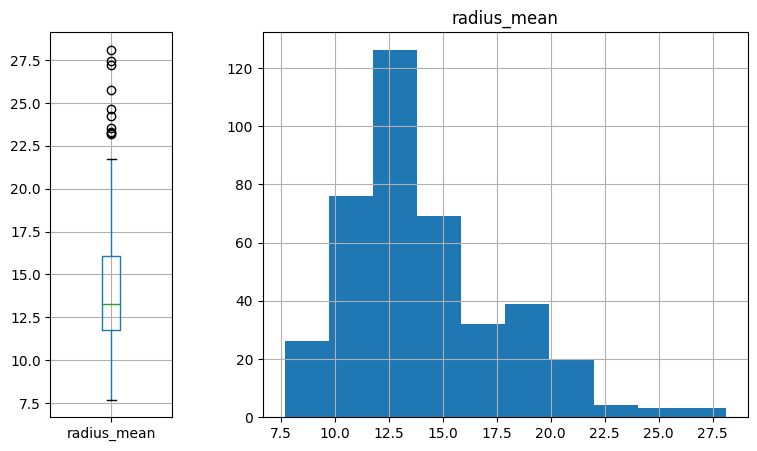

In [ ]:
#mirem, per exemple, el cas de la variable radius_mean
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
df_train.boxplot(column='radius_mean', ax=axes[0]);
df_train.hist(column='radius_mean', ax=axes[1]);


In [ ]:
Q1 = df_train['radius_mean'].quantile(0.25)
Q3 = df_train['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = df_train['radius_mean'] < (Q1 - 1.5 * IQR)
big_outliers = df_train['radius_mean'] > (Q3 + 1.5 * IQR)

print("small outliers:")
print(small_outliers)
print("big outliers:")
print(big_outliers)

df_train.radius_mean.median()

(11.7525, 16.09, 4.3375)

small outliers:
149    False
124    False
421    False
195    False
545    False
       ...  
71     False
106    False
270    False
435    False
102    False
Name: radius_mean, Length: 398, dtype: bool
big outliers:
149    False
124    False
421    False
195    False
545    False
       ...  
71     False
106    False
270    False
435    False
102    False
Name: radius_mean, Length: 398, dtype: bool


13.274999999999999

Veiem que tenim varis outliers superiors a la mitjana. Aquí hauríem de considerar que tot i ser outliers, potser no ens interessa treurel's del dataset ja que podríen ser casos de cèl·lules cancerígenes.


In [ ]:
df_train[small_outliers].diagnosis
print("-----")
df_train[big_outliers].diagnosis

Series([], Name: diagnosis, dtype: int64)

-----


180    1
352    1
521    1
122    1
202    1
164    1
236    1
212    1
461    1
339    1
Name: diagnosis, dtype: int64

En aquest cas, tots els outliers són casos de cèl·lules cancerígenes, i per tant no els hauríem d'excloure del dataset. Per no haver de fer aquest procés per cada variable mirarem les distribucions de probabilitat de cada variable respecte les cèl·lules malignes i benignes.

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='features', ylabel='value'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave.points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

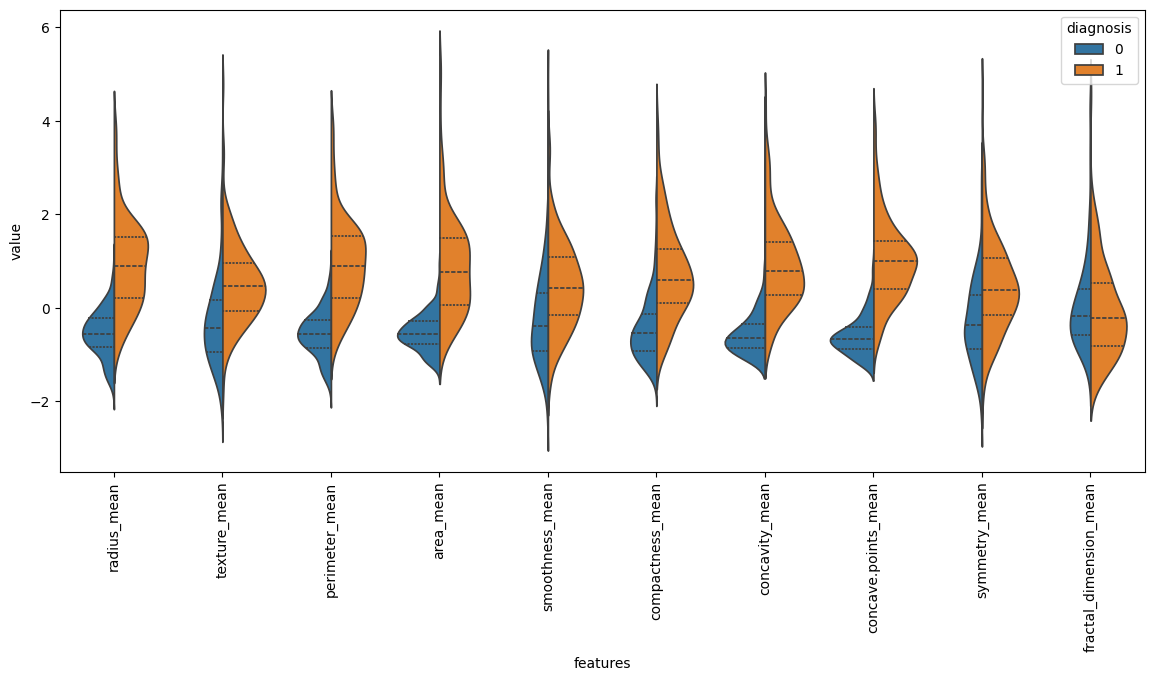

In [ ]:
data_dia = y_train
data = X_train
data_n_2 = (data - data.mean()) / (data.std())   # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='features', ylabel='value'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave.points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

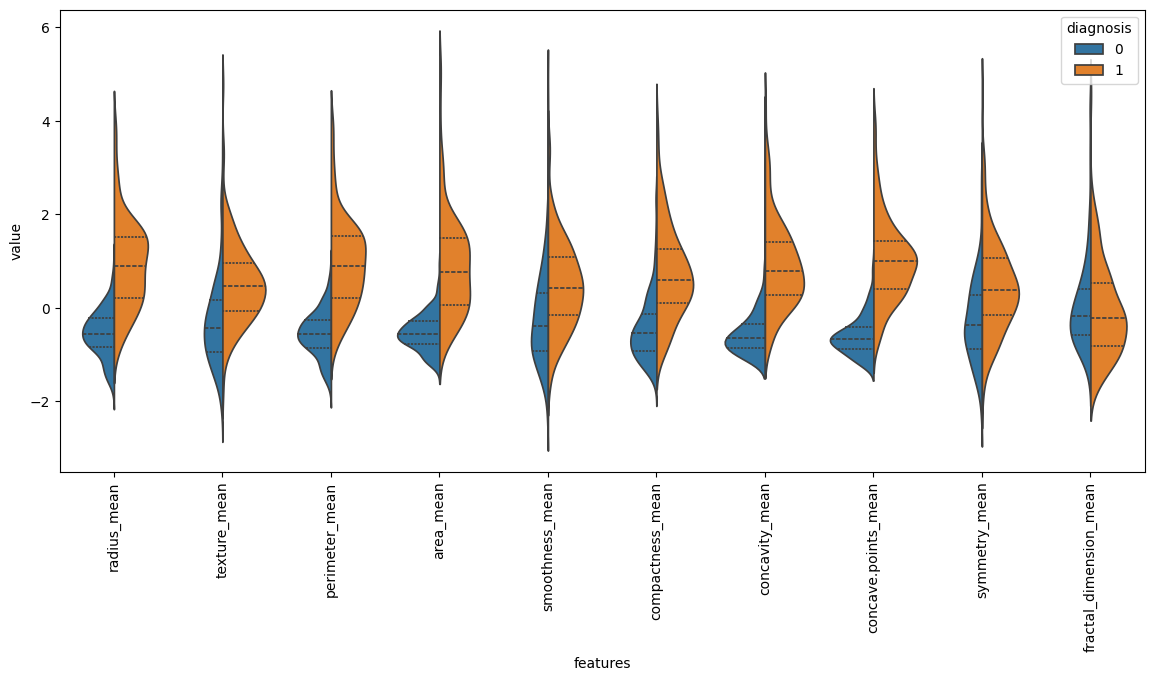

In [ ]:
data_dia = y_train
data = X_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='features', ylabel='value'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave.points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

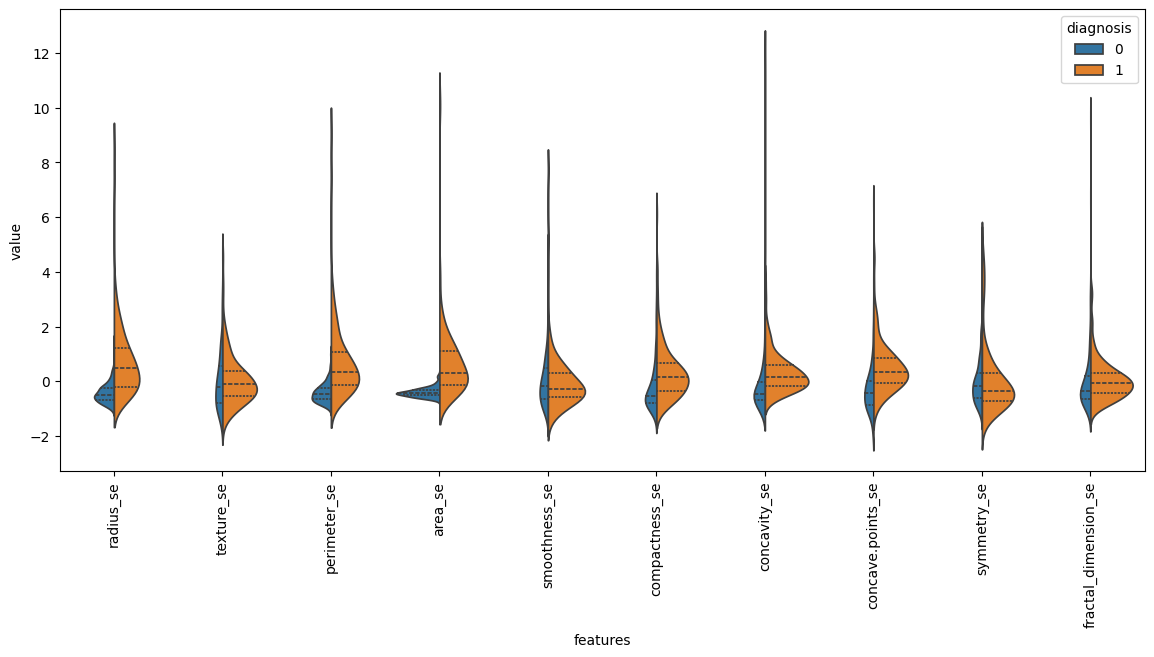

In [ ]:
data_dia = y_train
data = X_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='features', ylabel='value'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave.points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

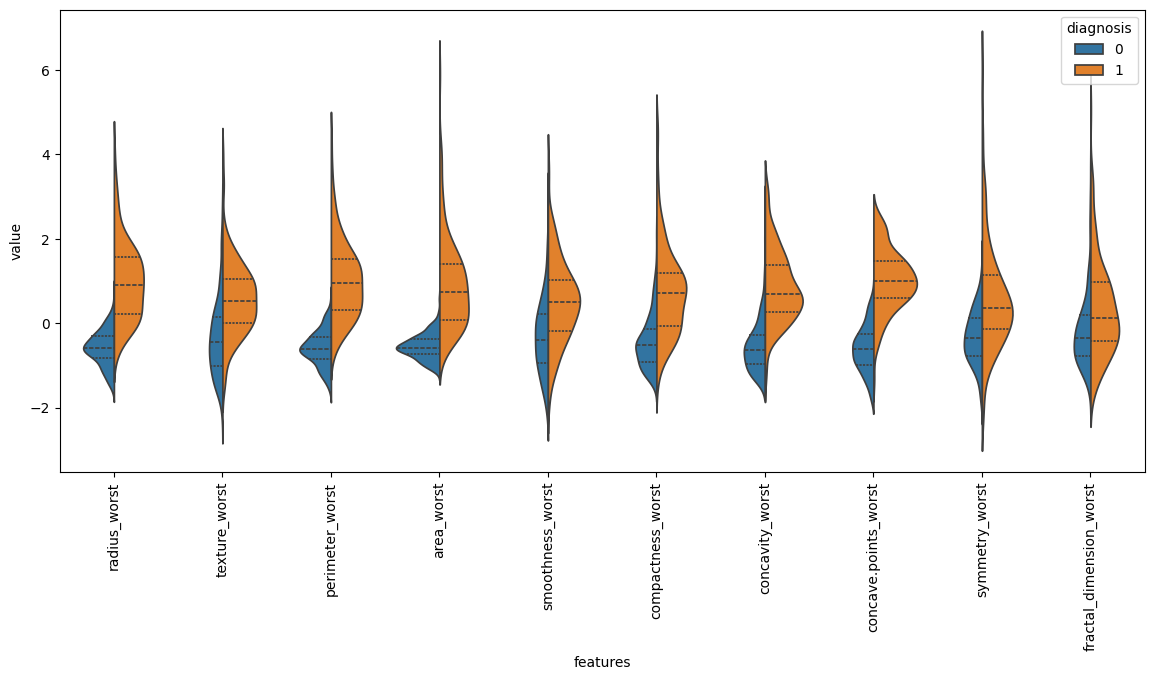

In [ ]:
data_dia = y_train
data = X_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Conclusions principals: No té gaire sentit considerar la pdf de les variables conjuntament, ja que en general la variància dels tumors malignes es molt més gran i amb una mitjana bastant diferent. Aquesta característica fa que la detecció d'outliers sigui molt més tediosa, ja que variables on el tumor és maligne, tot i que es detectaran com outliers, no es poden treure, ja que perdriem molta informacio.

In [ ]:
# ... more preprocessing to be done

In [ ]:
################# end of preprocessing

#SHUFFLE DATA
np.random.seed(144)
data_shuffled = data.sample(frac=1).reset_index(drop=True)

# **FEATURE SELECTION**
Amb aquest dataset serà molt important fer una bona features selection, ja que tenim moltes variables i no podrem fer-se servir totes, per tant escollir bé quines tenir en consideració a l'hora d'ajustar models és crucial. Segurament moltes estaràn altament correlades entre elles, ja que moltes variables donen valor a mesures similars, i per suposat, els triplets de variables mean, se i worst probablement també estaràn molt correlades.

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'diagnosis'),
  Text(1.5, 0, 'radius_mean'),
  Text(2.5, 0, 'texture_mean'),
  Text(3.5, 0, 'perimeter_mean'),
  Text(4.5, 0, 'area_mean'),
  Text(5.5, 0, 'smoothness_mean'),
  Text(6.5, 0, 'compactness_mean'),
  Text(7.5, 0, 'concavity_mean'),
  Text(8.5, 0, 'concave.points_mean'),
  Text(9.5, 0, 'symmetry_mean'),
  Text(10.5, 0, 'fractal_dimension_mean'),
  Text(11.5, 0, 'radius_se'),
  Text(12.5, 0, 'texture_se'),
  Text(13.5, 0, 'perimeter_se'),
  Text(14.5, 0, 'area_se'),
  Text(15.5, 0, 'smoothness_se'),
  Text(16.5, 0, 'compactness_se'),
  Text(17.5, 0, 'concavity_se'),
  Text(18.5, 0, 'concave.points_se'),
  Text(19.5, 0, 'symmetry_se'),
  Text(20.5, 0, 'fractal_dimension_se'),
  Text(21.5, 0, 'radius_worst'),
  Text(22.5, 0, 'texture_worst'),
  Text(23.5

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0, 0.5, 'diagnosis'),
  Text(0, 1.5, 'radius_mean'),
  Text(0, 2.5, 'texture_mean'),
  Text(0, 3.5, 'perimeter_mean'),
  Text(0, 4.5, 'area_mean'),
  Text(0, 5.5, 'smoothness_mean'),
  Text(0, 6.5, 'compactness_mean'),
  Text(0, 7.5, 'concavity_mean'),
  Text(0, 8.5, 'concave.points_mean'),
  Text(0, 9.5, 'symmetry_mean'),
  Text(0, 10.5, 'fractal_dimension_mean'),
  Text(0, 11.5, 'radius_se'),
  Text(0, 12.5, 'texture_se'),
  Text(0, 13.5, 'perimeter_se'),
  Text(0, 14.5, 'area_se'),
  Text(0, 15.5, 'smoothness_se'),
  Text(0, 16.5, 'compactness_se'),
  Text(0, 17.5, 'concavity_se'),
  Text(0, 18.5, 'concave.points_se'),
  Text(0, 19.5, 'symmetry_se'),
  Text(0, 20.5, 'fractal_dimension_se'),
  Text(0, 21.5, 'radius_worst'),
  Text(0, 22.5, 'texture_worst'),
  Text(0, 2

Text(0.5, 1.0, 'Correlation Map')

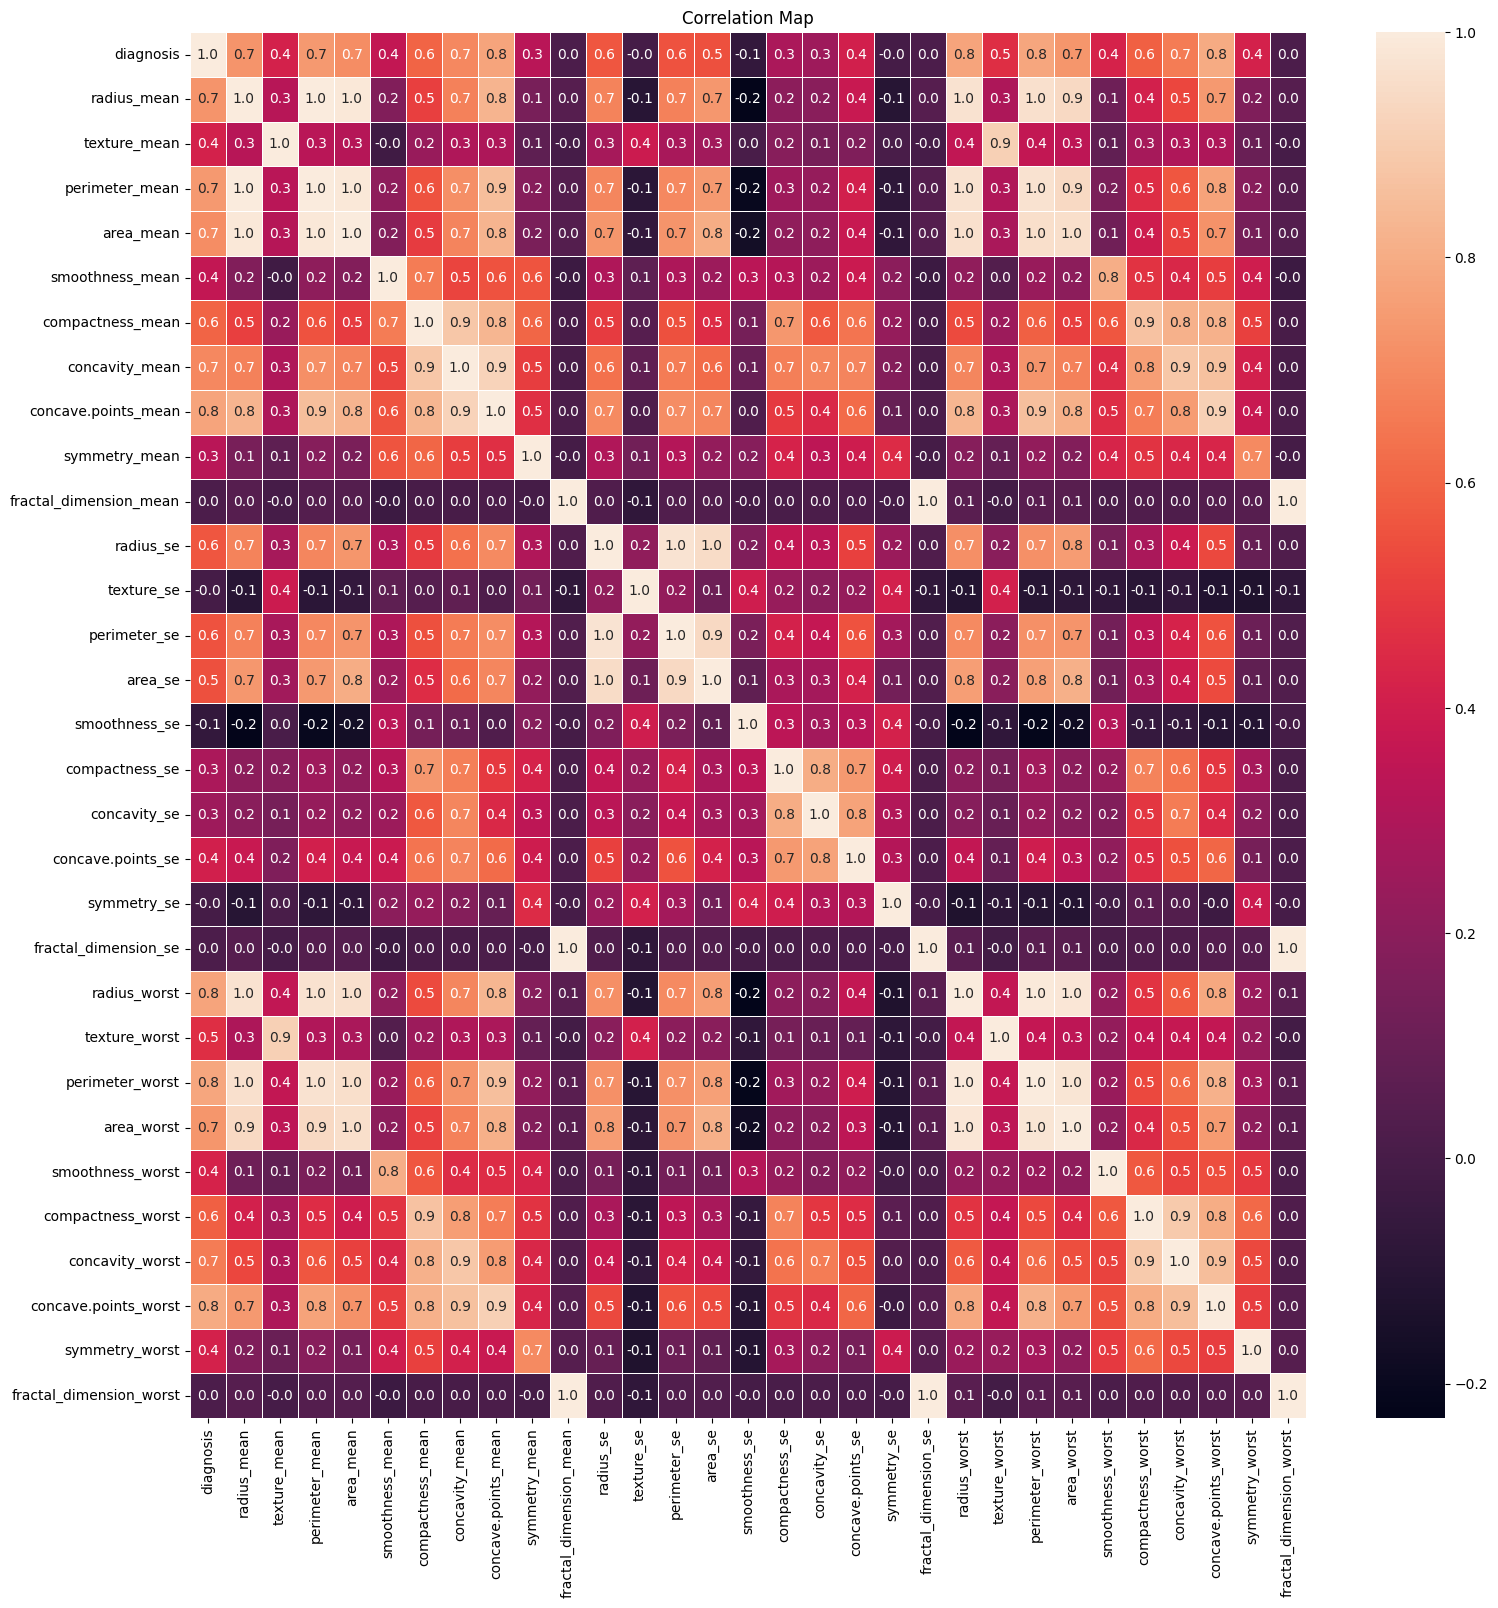

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

Efectivament, moltes variables estan altament correlades entre elles. De fet, es poden identificar fins i tot les diagonals (a part, evidenment, de la diagonal princial) que corresponen a les correlacions entre els triplets de variables mencionades, que tendeixen a tenir una alta correlació. Intuïtivament doncs, segurament no podrem utlilitzar m'és d'una variable de les tres.

Per altra banda, s'observa que no hi ha cap variable que estigui negativament correlada a la variable diagnosis (excepte alguns casos, però són correlacions molt baixes).

Ja s'havia comentat a la part d'introducció al dataset que les variables estaven dissenyades tal que més valor de la variable impliqués més probabilitat a ser maligne, i així és compleix.

<Figure size 1200x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation of Features with Target Variable (y)')

Text(0, 0.5, 'Correlation Coefficient')

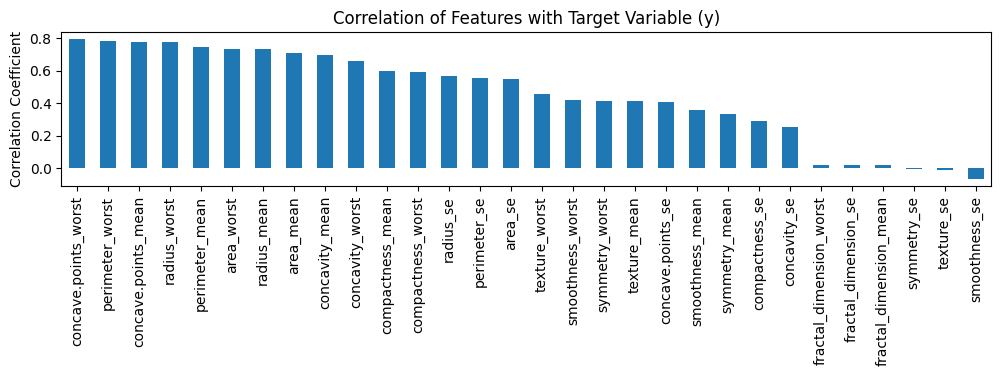

In [ ]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

df = pd.concat([X, y], axis=1)
cm = df.corr()
correlation_with_y = cm.iloc[:-1, -1]

# Visualize the correlation
plt.figure(figsize=(12, 2))
correlation_with_y.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Target Variable (y)')
plt.ylabel('Correlation Coefficient')
plt.show()

:La major part de les variables estan bastant correlades amb la variable diagnosis, i moltes d'elles ens servirien per ajustar models. Només ens falta com triar les variables (feature selection).

Una manera de fer feature selection és amb _recursive feature elimination_. Consisteix a ajustar un model no gaire complex, com Logistic Regression o Random Forest, i atribuïr pes de significació a les variables, i anar retallant les variables amb menys pes fins arribar a un nombre de variables deitjat (hiperparàmetre a decidir).




Efectivament, moltes variables estan altament correlades entre elles. De fet, es poden identificar fins i tot les diagonals (a part, evidenment, de la diagonal princial) que corresponen a les correlacions entre els triplets de variables mencionades, que tendeixen a tenir una alta correlació. Intuïtivament doncs, segurament no podrem utlilitzar m'és d'una variable de les tres.

Per altra banda, s'observa que no hi ha cap variable que estigui negativament correlada a la variable diagnosis (excepte alguns casos, però són correlacions molt baixes).

Ja s'havia comentat a la part d'introducció al dataset que les variables estaven dissenyades tal que més valor de la variable impliqués més probabilitat a ser maligne, i així és compleix.

Abans de començar amb mètodes de FEATURE SELECTION, podem fer una selecció prèvia de variables que estiguin molt correlacionades entre elles i les que no estàn gens correlacionades amb la variable target, que només són algunes varialbes de se. Abans de res traiem aqusetes variables:


In [ ]:
columns_to_drop = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'fractal_dimension_worst']
for column in columns_to_drop:
  df.drop(column, axis=1, inplace=True)

A continuació mirem quines varialbes estan molt correlacionades entre elles i quedem-nos només amb una d'elles. radius_mean, perimeter_mean, area_mean estan molt correlacionats -> ens quedem amb area_mean.

In [ ]:
columns_to_drop = ['radius_mean', 'area_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concave.points_worst',
                   'perimeter_se', 'concavity_se']
for column in columns_to_drop:
  df.drop(column, axis=1, inplace=True)

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'texture_mean'),
  Text(1.5, 0, 'perimeter_mean'),
  Text(2.5, 0, 'smoothness_mean'),
  Text(3.5, 0, 'compactness_mean'),
  Text(4.5, 0, 'concavity_mean'),
  Text(5.5, 0, 'concave.points_mean'),
  Text(6.5, 0, 'symmetry_mean'),
  Text(7.5, 0, 'radius_se'),
  Text(8.5, 0, 'compactness_se'),
  Text(9.5, 0, 'concave.points_se'),
  Text(10.5, 0, 'texture_worst'),
  Text(11.5, 0, 'area_worst'),
  Text(12.5, 0, 'smoothness_worst'),
  Text(13.5, 0, 'concavity_worst'),
  Text(14.5, 0, 'symmetry_worst'),
  Text(15.5, 0, 'diagnosis')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'texture_mean'),
  Text(0, 1.5, 'perimeter_mean'),
  Text(0, 2.5, 'smoothness_mean'),
  Text(0, 3.5, 'compactness_mean'),
  Text(0, 4.5, 'concavity_mean'),
  Text(0, 5.5, 'concave.points_mean'),
  Text(0, 6.5, 'symmetry_mean'),
  Text(0, 7.5, 'radius_se'),
  Text(0, 8.5, 'compactness_se'),
  Text(0, 9.5, 'concave.points_se'),
  Text(0, 10.5, 'texture_worst'),
  Text(0, 11.5, 'area_worst'),
  Text(0, 12.5, 'smoothness_worst'),
  Text(0, 13.5, 'concavity_worst'),
  Text(0, 14.5, 'symmetry_worst'),
  Text(0, 15.5, 'diagnosis')])

Text(0.5, 1.0, 'Correlation Map')

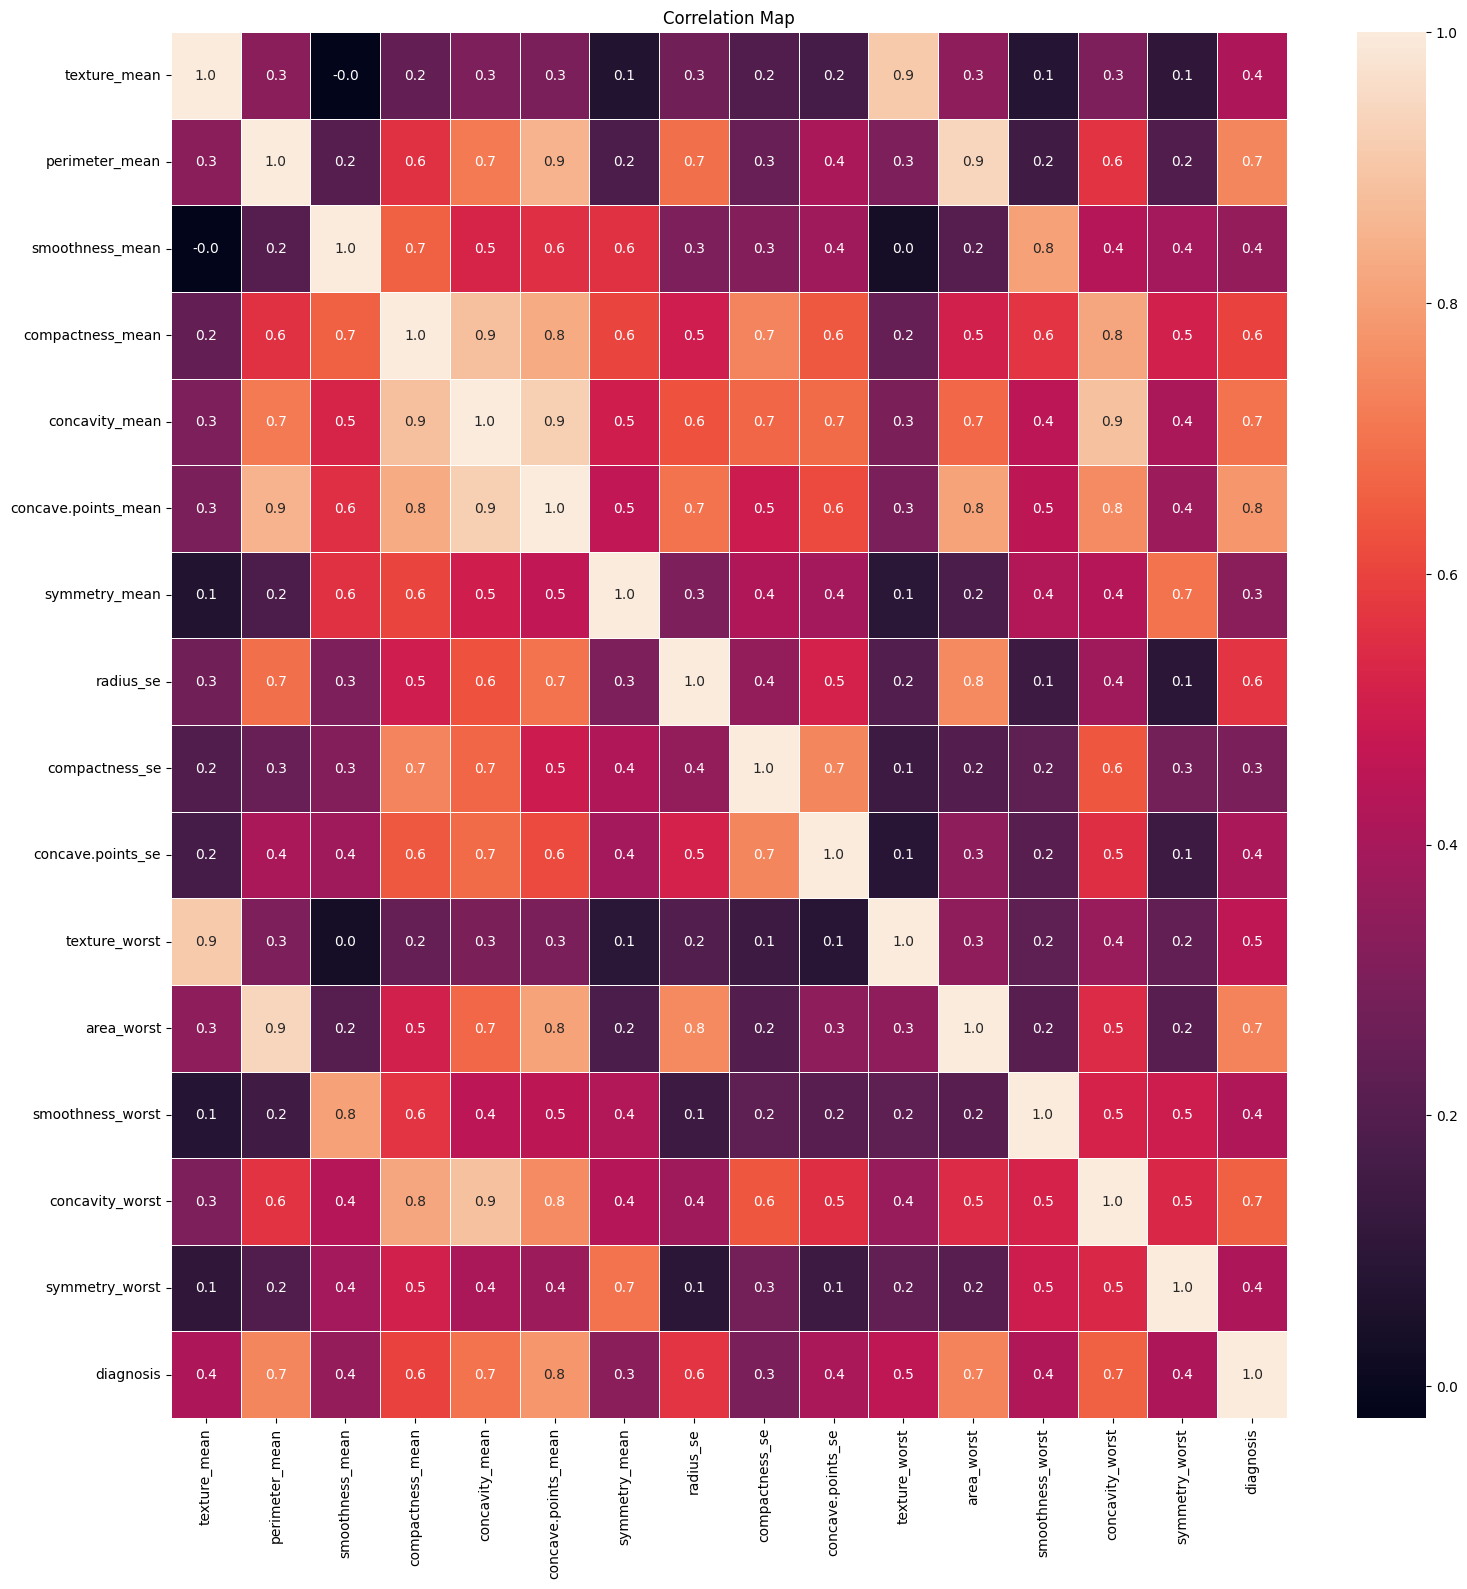

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()


Una alternativa encara més robusta és la _Feature Selection + Cross Validation_, que fa el mateix però ajusta també l'hiperparàmetre del nombre de variables amb les que ens volem quedar. El millor hiperparàmetre es pot decidir en funció de diferents criteris, com _recall_, _accuracy_, _F1 score_...

Utilitzarem l'implementació de Sklearn (RFECV)

<Figure size 1000x400 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (recall) of number \n of selected features')

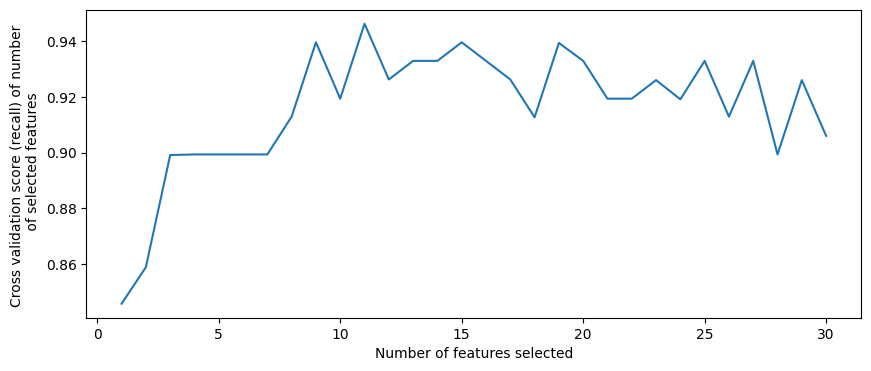

Optimal number of features : 11
Best features : Index(['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave.points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave.points_worst'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score


clf_rf_3 = RandomForestClassifier(random_state=4)
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)


plt.figure(figsize=(10, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall) of number \n of selected features")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Els pics més alts els tenim a 6, 8 i 11 variables. Per veure quines variables són, repetim l'experiment sense fer CV i fixat el nombre de variables que volguem obtenir.

In [ ]:
from sklearn.feature_selection import RFE

clf_rf = RandomForestClassifier(random_state=43)
rfe = RFE(estimator=clf_rf, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)
print('6 best eatures chosen by rfe:',X_train.columns[rfe.support_])

6 best eatures chosen by rfe: Index(['concavity_mean', 'concave.points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave.points_worst'],
      dtype='object')


In [ ]:
clf_rf = RandomForestClassifier(random_state=43)
rfe = RFE(estimator=clf_rf, n_features_to_select=9, step=1)
rfe = rfe.fit(X_train, y_train)
print('9 best eatures chosen by rfe:',X_train.columns[rfe.support_])

9 best eatures chosen by rfe: Index(['perimeter_mean', 'concavity_mean', 'concave.points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave.points_worst'],
      dtype='object')


# **Modelling -- with all features**

In [ ]:
def plot_CM(cm, title):
  f, ax = plt.subplots(figsize=(7,5))
  sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax)
  plt.title(title)
  plt.xlabel('Y predict')
  plt.ylabel('Y test')
  plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

def model_metrics_cv(model, X_train, y_train):
    '''
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics (cross-validation)
    '''

    model.fit(X_train, y_train)  #fit the model instance
    cv = cross_validate(model, X_train, y_train, cv=5,
                        scoring=('accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'))


    #extract metrics from cv variable
    accuracy = cv['test_accuracy'].mean()
    balanced_accuracy = cv['test_balanced_accuracy'].mean()
    f1 = cv['test_f1'].mean()
    precision = cv['test_precision'].mean()
    recall = cv['test_recall'].mean()
    roc_auc = cv['test_roc_auc'].mean()

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, balanced_accuracy, f1, precision, recall, roc_auc]], columns=['accuracy', 'balanced accuracy', 'f1 score', 'precision', 'recall', 'roc auc'])
    return eval_df

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

def model_metrics_test(model, X_train, y_train, X_test,y_test):
    '''
    X_train -- Training data
    y_train -- Traing labels
    X_test  -- Test data
    y_test  -- Test labels

    returns a dataframe for evaluating metrics (test) and a Confusion Matrix
    '''

    model.fit(X_train, y_train)  #fit the model with the whole train set
    test_predictions = model.predict(X_test) # calculate predictions

    # The confusion matrix
    cm = confusion_matrix(y_test, test_predictions)

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, balanced_accuracy, f1, precision, recall]], columns=['accuray', 'balanced accuracy', 'f1_score', 'precision', 'recall'])
    return (eval_df, cm)

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis( )

LDA_result = model_metrics_cv(LDA, X_train, y_train)
LDA_result.index = ["LDA"]
global_results = LDA_result

## QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()

QDAresult = model_metrics_cv(QDA, X_train, y_train)
QDAresult.index = ["QDA"]
global_results = pd.concat([global_results, QDAresult])

## K-nn

Com triem el nombre de veïns?

El millor valor de k és: 11


Text(0.5, 0, 'Valor de k per a KNN')

Text(0, 0.5, 'Precisió mitjana amb 10-fold CV')

Text(0.5, 1.0, 'Determinació del millor valor de k per a KNN')

([<matplotlib.axis.XTick at 0x7f466565a6b0>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

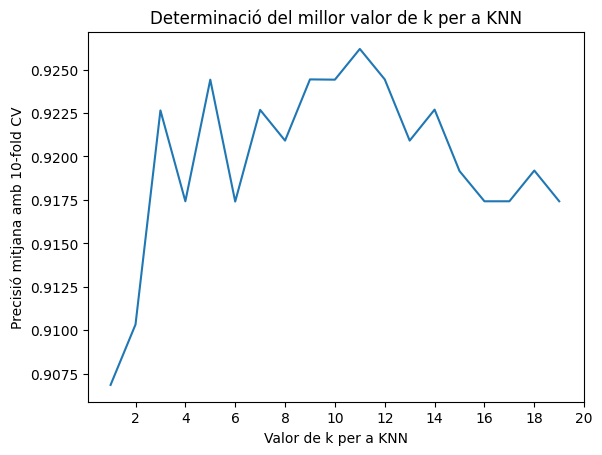

In [ ]:
k_range = range(1, 20)
k_scores = []
from sklearn.model_selection import cross_val_score, KFold
for n in k_range:
  KNN = KNeighborsClassifier(n_neighbors=n)
  score = cross_val_score(KNN, X, y, cv=5, scoring='accuracy')
  k_scores.append(score.mean())


best_k = k_range[np.argmax(k_scores)]
print(f'El millor valor de k és: {best_k}')

# Visualitza els resultats
plt.plot(k_range, k_scores)
plt.xlabel('Valor de k per a KNN')
plt.ylabel('Precisió mitjana amb 10-fold CV')
plt.title('Determinació del millor valor de k per a KNN')
plt.xticks(ticks=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.show()

El millor valor de k és: 3


Text(0.5, 0, 'Valor de k per a KNN')

Text(0, 0.5, 'Precisió mitjana amb 10-fold CV')

Text(0.5, 1.0, 'Determinació del millor valor de k per a KNN')

([<matplotlib.axis.XTick at 0x7f4665585780>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

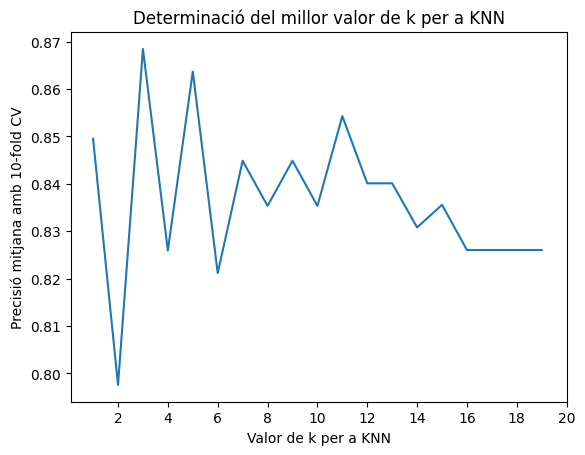

In [ ]:
#el mateix però amb scoring='recall'

k_range = range(1, 20)
k_scores = []
from sklearn.model_selection import cross_val_score, KFold
for n in k_range:
  KNN = KNeighborsClassifier(n_neighbors=n)
  score = cross_val_score(KNN, X, y, cv=5, scoring='recall')
  k_scores.append(score.mean())


best_k = k_range[np.argmax(k_scores)]
print(f'El millor valor de k és: {best_k}')

# Visualitza els resultats
plt.plot(k_range, k_scores)
plt.xlabel('Valor de k per a KNN')
plt.ylabel('Precisió mitjana amb 10-fold CV')
plt.title('Determinació del millor valor de k per a KNN')
plt.xticks(ticks=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.show()

Ens podríem quedar tant amb 3 com amb 5 veïns. Optem per 5.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
results_knn = model_metrics_cv(KNN, X_train, y_train)
results_knn.index =['KNN']
global_results = pd.concat([global_results, results_knn])

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
NB_result= model_metrics_cv(Naive_Bayes, X_train, y_train)
NB_result.index = ['NaiveBayes']
global_results = pd.concat([global_results, NB_result])

## Random Forest

In [ ]:
RFC = RandomForestClassifier()

RFC_result = model_metrics_cv(RFC, X_train, y_train)
RFC_result.index=["Random Forest"]
global_results = pd.concat([global_results, RFC_result])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

LogReg_result = model_metrics_cv(lg, X_train, y_train)
LogReg_result.index = ['LogisticReg']
global_results = pd.concat([global_results, LogReg_result])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Neural Network

In [ ]:
#next year...

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_results = model_metrics_cv(DT,X_train, y_train)

DT_results.index = ['DecisionTree']
global_results = pd.concat([global_results, DT_results])

## Boosting (AdaBoost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

AdaBoost_result = model_metrics_cv(AdaBoost, X_train, y_train)
AdaBoost_result.index = ['AdaBoost']

global_results = pd.concat([global_results, AdaBoost_result])

## Boosting (XGBoost)

In [ ]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
XGBoost_result = model_metrics_cv(xgboost, X_train, y_train)
XGBoost_result.index = ['XGBoost']

global_results = pd.concat([global_results, XGBoost_result])

In [ ]:
import seaborn as sns
tab = global_results.sort_values(by='recall',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
tab
print(time.process_time() - start)
#tab.to_html('tabla.html')

,accuracy,balanced accuracy,f1 score,precision,recall,roc auc
QDA,0.954652,0.954118,0.940541,0.930031,0.952644,0.990925
XGBoost,0.964842,0.959729,0.952518,0.966207,0.939540,0.988961
AdaBoost,0.954778,0.947688,0.938842,0.959310,0.919540,0.987083
Random Forest,0.949715,0.942125,0.931189,0.951602,0.912414,0.985934
DecisionTree,0.912152,0.910981,0.885825,0.866769,0.906207,0.910981
LogisticReg,0.942152,0.933492,0.921396,0.945255,0.899310,0.987218
NaiveBayes,0.937184,0.928051,0.913941,0.940893,0.892184,0.984806
LDA,0.949842,0.937063,0.929128,0.978553,0.886207,0.986995
KNN,0.914525,0.897821,0.879008,0.933523,0.831724,0.945795


11.942729689999993


# **Modelling -- selected features**

In [ ]:
best_features = ['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
                 'concave.points_mean', 'area_se', 'radius_worst', 'texture_worst',
                 'perimeter_worst', 'area_worst', 'concave.points_worst']


# Selecciona només les columnes especificades
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

KNN = KNeighborsClassifier(n_neighbors=5, )
results_knn = model_metrics_cv(KNN, X_train_selected, y_train)
results_knn.index =['KNN']
global_results_2 = results_knn


LDA_result = model_metrics_cv(LDA, X_train_selected, y_train)
LDA_result.index = ["LDA"]
global_results_2 = pd.concat([global_results_2, LDA_result])



QDAresult = model_metrics_cv(QDA, X_train_selected, y_train)
QDAresult.index = ["QDA"]
global_results_2 = pd.concat([global_results_2, QDAresult])


Naive_Bayes = GaussianNB()
NB_result = model_metrics_cv(Naive_Bayes, X_train_selected, y_train)
NB_result.index = ['NaiveBayes']
global_results_2 = pd.concat([global_results_2, NB_result])


RFC = RandomForestClassifier()
RFC_result = model_metrics_cv(RFC, X_train_selected, y_train)
RFC_result.index=["Random Forest"]
global_results_2 = pd.concat([global_results_2, RFC_result])


lg = LogisticRegression()
(LogReg_result) = model_metrics_cv(lg, X_train_selected, y_train)
LogReg_result.index = ['LogisticReg']
global_results_2 = pd.concat([global_results_2, LogReg_result])


DT = DecisionTreeClassifier()
DT_results = model_metrics_cv(DT,X_train_selected, y_train)
DT_results.index = ['DecisionTree']
global_results_2 = pd.concat([global_results_2, DT_results])



AdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
AdaBoost_result = model_metrics_cv(AdaBoost, X_train_selected, y_train)
AdaBoost_result.index = ['AdaBoost']
global_results_2 = pd.concat([global_results_2, AdaBoost_result])


xgboost = xgb.XGBClassifier()
XGBoost_result = model_metrics_cv(xgboost, X_train_selected, y_train)
XGBoost_result.index = ['XGBoost']
global_results_2 = pd.concat([global_results_2, XGBoost_result])


#plot results
global_results_2.sort_values(by='recall',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,accuracy,balanced accuracy,f1 score,precision,recall,roc auc
AdaBoost,0.959715,0.955648,0.946066,0.953504,0.939540,0.981797
QDA,0.957278,0.953574,0.942752,0.947527,0.939310,0.990951
DecisionTree,0.952278,0.948314,0.936731,0.943069,0.932874,0.948314
XGBoost,0.954778,0.950240,0.939364,0.947312,0.932644,0.977066
Random Forest,0.959810,0.951614,0.944906,0.972414,0.919310,0.987977
LDA,0.957310,0.944207,0.939692,0.992593,0.892414,0.988728
NaiveBayes,0.932120,0.917155,0.903407,0.958004,0.858391,0.989215
LogisticReg,0.914494,0.901699,0.881673,0.918973,0.851724,0.982089
KNN,0.914525,0.897821,0.879008,0.933523,0.831724,0.945795


#**Modelling with standarization**

In [ ]:
X_train_stand = (X_train - X_train.mean()) / X_train.std()
X_test_stand = (X_test - X_test.mean()) / X_test.std()



best_features = ['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
                 'concave.points_mean', 'area_se', 'radius_worst', 'texture_worst',
                 'perimeter_worst', 'area_worst', 'concave.points_worst']




# Selecciona només les columnes especificades
X_train_stand_selected = X_train_stand[best_features]
X_test_stand_selected = X_test_stand[best_features]

import time
start = time.process_time()
# your code here




KNN = KNeighborsClassifier(n_neighbors=5)
results_knn = model_metrics_cv(KNN, X_train_stand_selected, y_train)
results_knn.index =['KNN']
global_results_2 = results_knn


LDA_result = model_metrics_cv(LDA, X_train_stand_selected, y_train)
LDA_result.index = ["LDA"]
global_results_2 = pd.concat([global_results_2, LDA_result])



QDAresult = model_metrics_cv(QDA, X_train_stand_selected, y_train)
QDAresult.index = ["QDA"]
global_results_2 = pd.concat([global_results_2, QDAresult])


Naive_Bayes = GaussianNB()
NB_result = model_metrics_cv(Naive_Bayes, X_train_stand_selected, y_train)
NB_result.index = ['NaiveBayes']
global_results_2 = pd.concat([global_results_2, NB_result])



RFC = RandomForestClassifier()
RFC_result = model_metrics_cv(RFC, X_train_stand_selected, y_train)
RFC_result.index=["Random Forest"]
global_results_2 = pd.concat([global_results_2, RFC_result])


lg = LogisticRegression()
(LogReg_result) = model_metrics_cv(lg, X_train_stand_selected, y_train)
LogReg_result.index = ['LogisticReg']
global_results_2 = pd.concat([global_results_2, LogReg_result])


DT = DecisionTreeClassifier()
DT_results = model_metrics_cv(DT,X_train_stand_selected, y_train)
DT_results.index = ['DecisionTree']
global_results_2 = pd.concat([global_results_2, DT_results])



AdaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
AdaBoost_result = model_metrics_cv(AdaBoost, X_train_stand_selected, y_train)
AdaBoost_result.index = ['AdaBoost']
global_results_2 = pd.concat([global_results_2, AdaBoost_result])


xgboost = xgb.XGBClassifier()
XGBoost_result = model_metrics_cv(xgboost, X_train_stand_selected, y_train)
XGBoost_result.index = ['XGBoost']
global_results_2 = pd.concat([global_results_2, XGBoost_result])



print(time.process_time() - start)

global_results_2.sort_values(by='recall',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

7.64224389200001


,accuracy,balanced accuracy,f1 score,precision,recall,roc auc
LogisticReg,0.964810,0.960981,0.952827,0.960774,0.946207,0.990580
Random Forest,0.967342,0.961729,0.955791,0.973103,0.939540,0.988546
AdaBoost,0.959715,0.955648,0.946066,0.953504,0.939540,0.980624
KNN,0.964842,0.959655,0.952240,0.967270,0.939310,0.976934
QDA,0.957278,0.953574,0.942752,0.947527,0.939310,0.990951
DecisionTree,0.942184,0.940159,0.923973,0.918727,0.932644,0.940159
XGBoost,0.954778,0.950240,0.939364,0.947312,0.932644,0.977066
NaiveBayes,0.944715,0.936718,0.924088,0.945272,0.905517,0.986585
LDA,0.957310,0.944207,0.939692,0.992593,0.892414,0.988728


# **Final models**

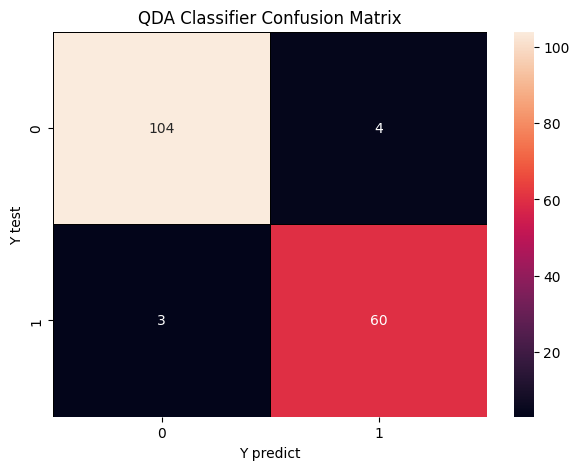

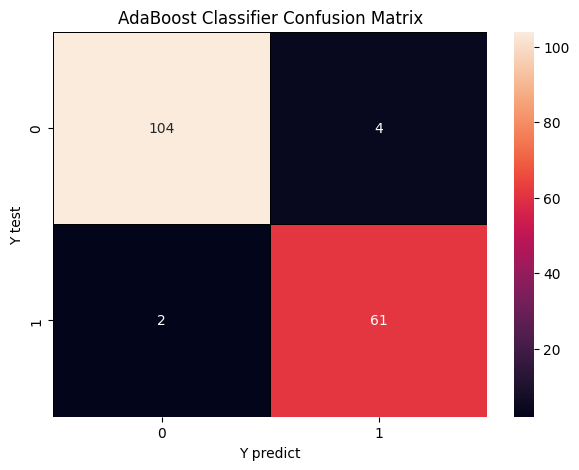

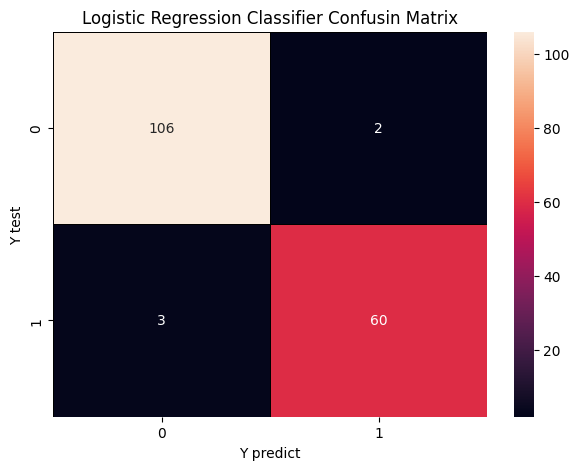

,accuray,balanced accuracy,f1_score,precision,recall
AdaBoost,0.964912,0.965608,0.953125,0.938462,0.968254
LogisticReg,0.970760,0.966931,0.960000,0.967742,0.952381
QDA,0.959064,0.957672,0.944882,0.937500,0.952381


In [ ]:
QDAresult, cmQDA = model_metrics_test(QDA, X_train, y_train, X_test, y_test)
QDAresult.index = ["QDA"]
final_result = QDAresult
plot_CM(cmQDA, "QDA Classifier Confusion Matrix")


AdaBoost_result, cmAB = model_metrics_test(AdaBoost, X_train_selected, y_train, X_test_selected, y_test)
AdaBoost_result.index = ['AdaBoost']
final_result = pd.concat([final_result, AdaBoost_result])
plot_CM(cmAB, "AdaBoost Classifier Confusion Matrix")



(LogReg_result, cmLR) = model_metrics_test(lg, X_train_stand_selected, y_train, X_test_stand_selected, y_test)
LogReg_result.index = ['LogisticReg']
final_result = pd.concat([LogReg_result, final_result])
plot_CM(cmLR, "Logistic Regression Classifier Confusin Matrix")

final_result.sort_values(by='recall',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))